# Setup

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

UNCLEADED_DATASET_PATH: str = 'updated_dataset.csv'
CLEANED_DATASET_PATH: str = 'cleaned_dataset.csv'

SONG_KEY_MAP: dict[int, str] = {
    -1: 'No-Key',
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}

TIME_SIGNATURE_MAP: dict[int, str] = {
    -1: "No-Time-Signature",
    3: "3/4",
    4: "4/4",
    5: "5/4",
    6: "6/4",
    7: "7/4",
}

uncleaned_df: pd.DataFrame = pd.read_csv(UNCLEADED_DATASET_PATH)
uncleaned_df.fillna(-1, inplace=True)
uncleaned_df.dropna(inplace=True)
uncleaned_df.info()
uncleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80728 entries, 0 to 80727
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      80728 non-null  int64  
 1   Unnamed: 0        80728 non-null  int64  
 2   track_id          80728 non-null  object 
 3   artists           80728 non-null  object 
 4   album_name        80728 non-null  object 
 5   track_name        80728 non-null  object 
 6   popularity        80728 non-null  int64  
 7   duration_ms       80728 non-null  int64  
 8   explicit          80728 non-null  bool   
 9   danceability      80728 non-null  float64
 10  energy            80728 non-null  float64
 11  key               80728 non-null  int64  
 12  loudness          80728 non-null  float64
 13  mode              80728 non-null  int64  
 14  speechiness       80728 non-null  float64
 15  acousticness      80728 non-null  float64
 16  instrumentalness  80728 non-null  float6

,Unnamed: 0.1,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,93933,93933,2Sou8iE7YS2h4lblj9oyQ6,Oleg Pogudin,The Best Songs,Свидание,0,141506,False,0.3950,...,-17.867,0,0.0417,0.948,0.000017,0.109,0.179,93.235,3,romance
1,93638,93638,0SIY0EVSYfJIDyIae3qCKS,Vadim Kozin,Поёт Вадим Козин (2022 Remastered),Русая Головка - 2022 Remastered,0,150000,False,0.5390,...,-14.622,0,0.0518,0.975,0.000033,0.143,0.814,96.037,4,romance
2,93836,93836,5mqMiyQncZO1KJOKdORzA1,Sergei Lemeshev,В эту лунную ночь,Роняет лес багряный свой убор,0,197786,False,0.3340,...,-14.943,0,0.0645,0.992,0.000005,0.147,0.112,83.135,1,romance
3,76134,76134,4l7KcjPVAlXttjNfogwNAa,Adolphe Adam;phil Blech Wien;Anton Mittermayr;...,Classical Christmas,Cantique de Noël,0,292173,False,0.2790,...,-9.885,1,0.0320,0.984,0.005810,0.136,0.183,66.886,4,opera
4,16034,16034,18fjez7hjQ13XLSRqgtven,Johann Sebastian Bach;Boston Pops Orchestra;Ar...,Classical Christmas,Cantata BWV 208 (Arr. William Walton): Sheep M...,0,283933,False,0.0965,...,-16.970,1,0.0393,0.967,0.958000,0.169,0.238,78.351,4,classical


# Type Conversions and Dummy Extraction

In [13]:
typed_df: pd.DataFrame = uncleaned_df.copy()

# convert explicit column to binary
typed_df["explicit"] = typed_df["explicit"].map({True: 1, False: 0})

# # extract keys
# print(f"{typed_df['key'].unique().shape[0]} unique keys")
# typed_df["key"] = typed_df["key"].map(SONG_KEY_MAP)
# song_keys = typed_df["key"].dropna().unique()
# typed_df = pd.get_dummies(typed_df, columns=["key"], dtype=int)

# # extract time signatures
# print(f"{typed_df['time_signature'].unique().shape[0]} unique time signatures")
# typed_df["time_signature"] = typed_df["time_signature"].map(TIME_SIGNATURE_MAP)
# time_signatures = typed_df["time_signature"].dropna().unique()
# typed_df = pd.get_dummies(typed_df, columns=["time_signature"], dtype=int)

# # extract genres
# print(f"{typed_df['track_genre'].unique().shape[0]} unique genres")
# genres = typed_df["track_genre"].dropna().unique()
# typed_df = pd.get_dummies(typed_df, columns=["track_genre"], dtype=int)

typed_df.info()
typed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80728 entries, 0 to 80727
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      80728 non-null  int64  
 1   Unnamed: 0        80728 non-null  int64  
 2   track_id          80728 non-null  object 
 3   artists           80728 non-null  object 
 4   album_name        80728 non-null  object 
 5   track_name        80728 non-null  object 
 6   popularity        80728 non-null  int64  
 7   duration_ms       80728 non-null  int64  
 8   explicit          80728 non-null  int64  
 9   danceability      80728 non-null  float64
 10  energy            80728 non-null  float64
 11  key               80728 non-null  int64  
 12  loudness          80728 non-null  float64
 13  mode              80728 non-null  int64  
 14  speechiness       80728 non-null  float64
 15  acousticness      80728 non-null  float64
 16  instrumentalness  80728 non-null  float6

,Unnamed: 0.1,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,93933,93933,2Sou8iE7YS2h4lblj9oyQ6,Oleg Pogudin,The Best Songs,Свидание,0,141506,0,0.3950,...,-17.867,0,0.0417,0.948,0.000017,0.109,0.179,93.235,3,romance
1,93638,93638,0SIY0EVSYfJIDyIae3qCKS,Vadim Kozin,Поёт Вадим Козин (2022 Remastered),Русая Головка - 2022 Remastered,0,150000,0,0.5390,...,-14.622,0,0.0518,0.975,0.000033,0.143,0.814,96.037,4,romance
2,93836,93836,5mqMiyQncZO1KJOKdORzA1,Sergei Lemeshev,В эту лунную ночь,Роняет лес багряный свой убор,0,197786,0,0.3340,...,-14.943,0,0.0645,0.992,0.000005,0.147,0.112,83.135,1,romance
3,76134,76134,4l7KcjPVAlXttjNfogwNAa,Adolphe Adam;phil Blech Wien;Anton Mittermayr;...,Classical Christmas,Cantique de Noël,0,292173,0,0.2790,...,-9.885,1,0.0320,0.984,0.005810,0.136,0.183,66.886,4,opera
4,16034,16034,18fjez7hjQ13XLSRqgtven,Johann Sebastian Bach;Boston Pops Orchestra;Ar...,Classical Christmas,Cantata BWV 208 (Arr. William Walton): Sheep M...,0,283933,0,0.0965,...,-16.970,1,0.0393,0.967,0.958000,0.169,0.238,78.351,4,classical


# Feature Selection and Engineering

In [14]:
# Removals
feature_df = typed_df.copy()
feature_df.drop(columns=["track_id", "artists", "album_name", "track_name"], inplace=True)

# Engineering
feature_df["duration_ms"] = feature_df["duration_ms"].astype(np.float64)
feature_df["duration_ms"] = feature_df["duration_ms"] / 1000  # convert to seconds
feature_df.rename(columns={"duration_ms": "duration_s"}, inplace=True)

feature_df.info()
feature_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80728 entries, 0 to 80727
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      80728 non-null  int64  
 1   Unnamed: 0        80728 non-null  int64  
 2   popularity        80728 non-null  int64  
 3   duration_s        80728 non-null  float64
 4   explicit          80728 non-null  int64  
 5   danceability      80728 non-null  float64
 6   energy            80728 non-null  float64
 7   key               80728 non-null  int64  
 8   loudness          80728 non-null  float64
 9   mode              80728 non-null  int64  
 10  speechiness       80728 non-null  float64
 11  acousticness      80728 non-null  float64
 12  instrumentalness  80728 non-null  float64
 13  liveness          80728 non-null  float64
 14  valence           80728 non-null  float64
 15  tempo             80728 non-null  float64
 16  time_signature    80728 non-null  int64 

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,93933,93933,0,141.506,0,0.3950,0.135,6,-17.867,0,0.0417,0.948,0.000017,0.109,0.179,93.235,3,romance
1,93638,93638,0,150.000,0,0.5390,0.207,2,-14.622,0,0.0518,0.975,0.000033,0.143,0.814,96.037,4,romance
2,93836,93836,0,197.786,0,0.3340,0.180,6,-14.943,0,0.0645,0.992,0.000005,0.147,0.112,83.135,1,romance
3,76134,76134,0,292.173,0,0.2790,0.273,3,-9.885,1,0.0320,0.984,0.005810,0.136,0.183,66.886,4,opera
4,16034,16034,0,283.933,0,0.0965,0.200,10,-16.970,1,0.0393,0.967,0.958000,0.169,0.238,78.351,4,classical


# Exporting

In [15]:
final_df = feature_df.copy()
final_df.to_csv(CLEANED_DATASET_PATH, index=False)

count    80728.000000
mean        35.500285
std         19.265412
min          0.000000
25%         21.000000
50%         36.000000
75%         50.000000
max        100.000000
Name: popularity, dtype: float64

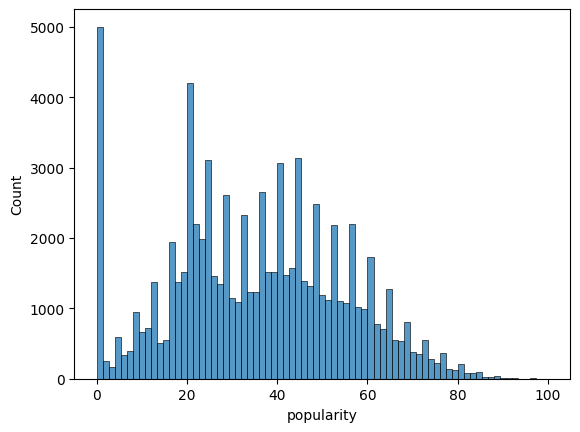

In [16]:
histogram_df = feature_df.copy()
# histogram = sns.histplot(histogram_df["popularity"])
# histogram.set(xlabel="Popularity", ylabel="Count")
boxplot = sns.histplot(histogram_df["popularity"])

boxplot
histogram_df["popularity"].describe()